In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%%time
identity=pd.read_csv("train_identity.csv")
transaction=pd.read_csv("train_transaction.csv")

Wall time: 49.7 s


In [3]:
print("Shape of train_identity.csv",identity.shape)
print("Shape of train_transaction.csv",transaction.shape)

Shape of train_identity.csv (144233, 41)
Shape of train_transaction.csv (590540, 394)


In [4]:
identity.columns[identity.isnull().any()]

Index(['id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09',
       'id_10', 'id_11', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18',
       'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26',
       'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34',
       'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')

In [5]:
identity.isnull().sum().sort_values(ascending=False).head()

id_24    139486
id_25    139101
id_07    139078
id_08    139078
id_21    139074
dtype: int64

In [6]:
transaction.columns[transaction.isnull().any()]

Index(['card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1',
       'dist2', 'P_emaildomain',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=374)

In [7]:
transaction.isnull().sum().sort_values(ascending=False).head()

dist2    552913
D7       551623
D13      528588
D14      528353
D12      525823
dtype: int64

In [8]:
identity.TransactionID.nunique()

144233

In [9]:
transaction.TransactionID.nunique()

590540

In [10]:
identity.columns[identity.isnull().any()]#39 columns has null values

Index(['id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09',
       'id_10', 'id_11', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18',
       'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26',
       'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34',
       'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')

In [11]:
#Number of null values in each column
null_identity_frame=identity.isnull().sum().to_frame().T

In [12]:
#Removing columns with more than 50% of missing values
drop_columns=[]
for col in null_identity_frame.columns:
    if(null_identity_frame.loc[0,col]==0):
        continue
    elif((null_identity_frame.loc[0,col]*100/identity.shape[0])>70):
        drop_columns.append(col)
    else:
        continue
       # print(f'columns {col} has {round(null_identity_frame.loc[0,col]*100/identity.shape[0])}% of null values')

In [13]:
identity.drop(columns=drop_columns,inplace=True)

In [14]:
identity.shape

(144233, 32)

In [15]:
identity.id_01.describe()

count    144233.000000
mean        -10.170502
std          14.347949
min        -100.000000
25%         -10.000000
50%          -5.000000
75%          -5.000000
max           0.000000
Name: id_01, dtype: float64

In [16]:
df=transaction.merge(identity,copy=True,how="left",on="TransactionID")

In [17]:
print("Dataset has {} rows".format(df.shape[0]))
print("Dataset has {} columns".format(df.shape[1]))

Dataset has 590540 rows
Dataset has 425 columns


In [18]:
print("Total {} columns has null values".format(len(df.columns[df.isnull().any()])))

Total 405 columns has null values


In [19]:
%%time
drop_columns=[]
for col in df.columns:
    if(round((df[col].isnull().sum()*100)/df.shape[0])>=50):
        drop_columns.append(col)
    else:
        
        continue

Wall time: 6.98 s


In [20]:
print("Total {} columns has more than 50% of missing values".format(len(drop_columns)))

Total 205 columns has more than 50% of missing values


In [22]:
t=df.isnull().sum().reset_index().sort_values(ascending=False,by=[0])#.plot(kind='barh',figsize=(12,7))

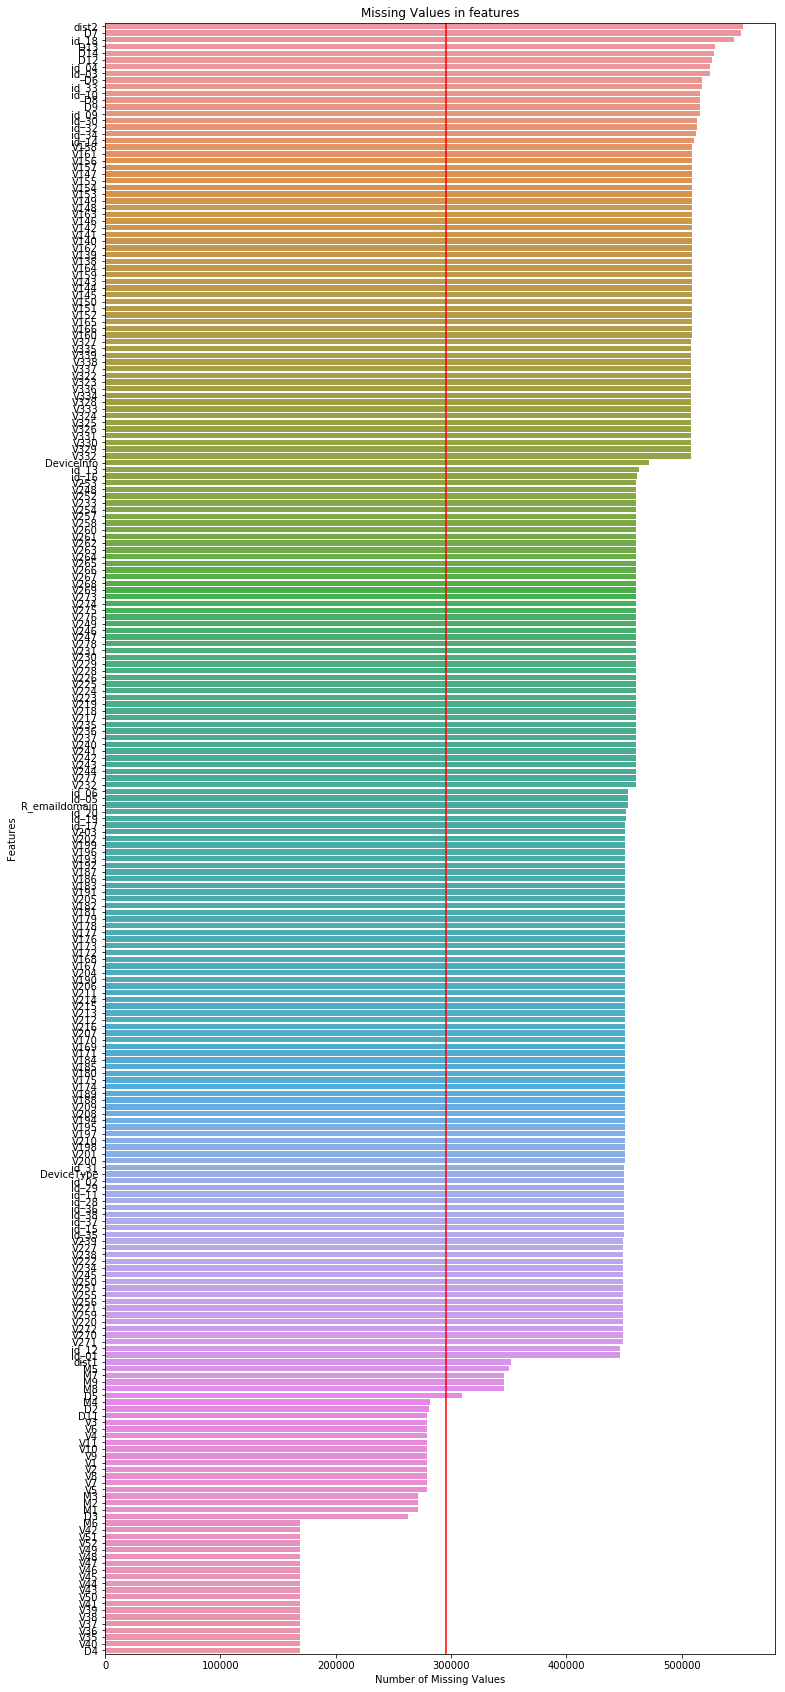

In [27]:

fig,ax=plt.subplots(figsize=(12,30))
sns.barplot(x=t[t[0]>100000][0],y=t[t[0]>100000]['index'],ax=ax)
ax.set_title("Missing Values in features")
ax.set_xlabel("Number of Missing Values")
ax.set_ylabel("Features")
ax.axvline(df.shape[0]/2,color="r")
plt.show()

In [28]:
#Dropping columns with more than 50% of missing values
df.drop(columns=drop_columns,inplace=True)

In [29]:
categorical_columns=df.select_dtypes(include="object").columns.tolist()

# Treating missing categorical values

In [30]:
%%time
for col in categorical_columns:
    if(df[col].isnull().sum()>=0 and df[col].isnull().sum()<10000):
        df.dropna(subset=[col],inplace=True)
        print(f'Dropping rows for null values in column {col}')
    else:
        print(f'Column {col} has {df[col].isnull().sum()} null values and {df[col].nunique()} unique value')

Dropping rows for null values in column ProductCD
Dropping rows for null values in column card4
Dropping rows for null values in column card6
Column P_emaildomain has 94227 null values and 59 unique value
Column M1 has 270736 null values and 2 unique value
Column M2 has 270736 null values and 2 unique value
Column M3 has 270736 null values and 2 unique value
Column M4 has 280739 null values and 3 unique value
Column M6 has 169098 null values and 2 unique value
Wall time: 5.35 s


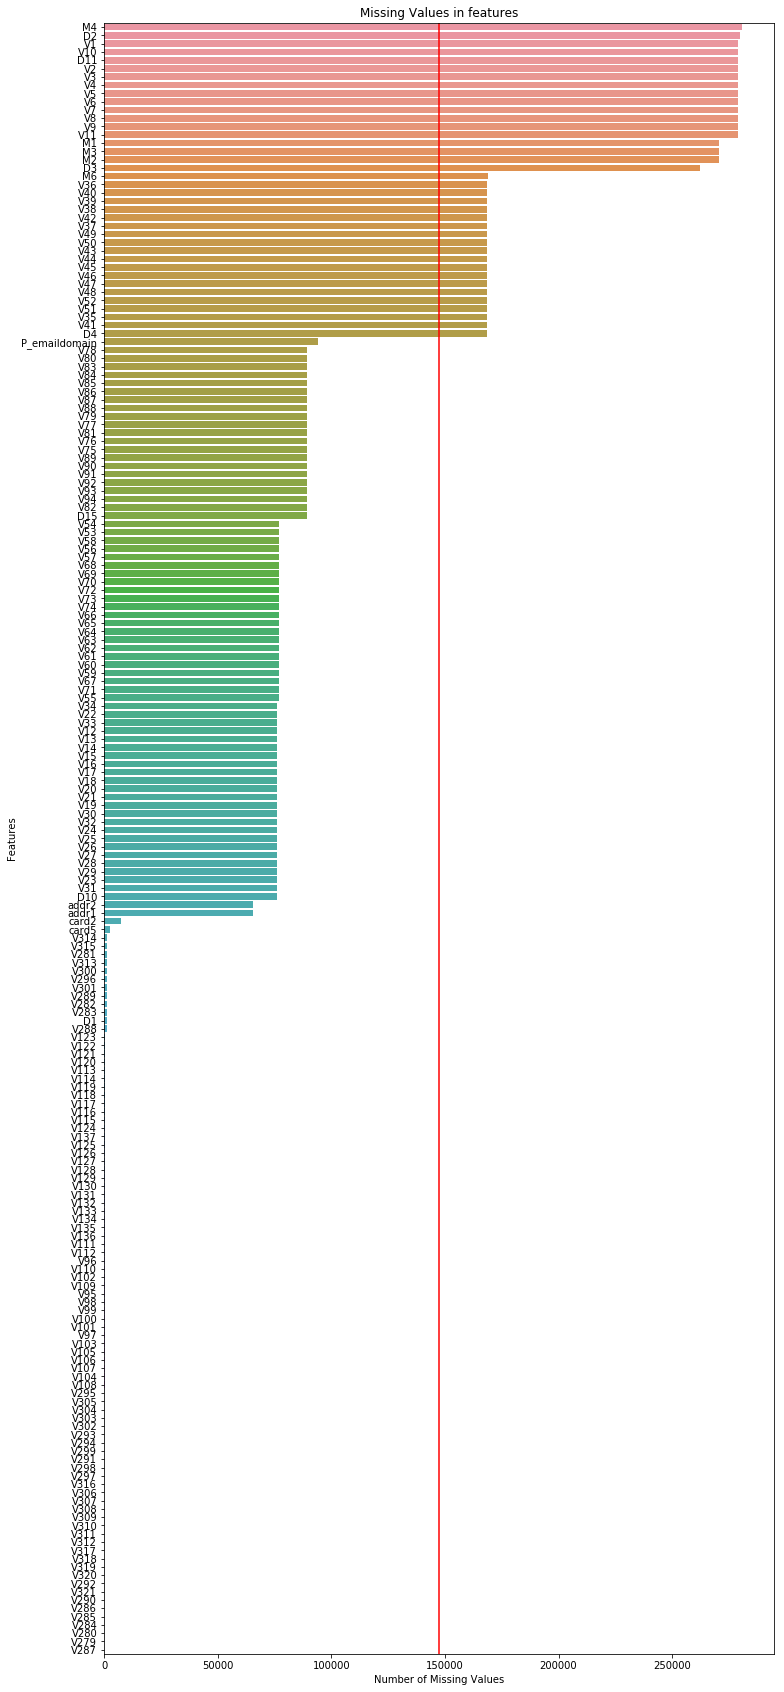

In [32]:
t=df.isnull().sum().reset_index().sort_values(ascending=False,by=[0])#.plot(kind='barh',figsize=(12,7))
fig,ax=plt.subplots(figsize=(12,30))
sns.barplot(x=t[t[0]>0][0],y=t[t[0]>0]['index'],ax=ax)
ax.set_title("Missing Values in features")
ax.set_xlabel("Number of Missing Values")
ax.set_ylabel("Features")
ax.axvline(df.shape[0]/4,color="r")
plt.show()

In [33]:
#Reference from https://www.kaggle.com/haataa/complete-eda-with-background-knowledge
def compare_cate(df,colname,targetname):
    """check target value difference of given category
    in the case of binary classifications.
    
    Args
    df: data frame.
    colname: string. The column name to be evaluated.
    targetname: string. The column name of the target variable.
    
    Returns
    None
    """
    # caculate aggregate stats
    df_cate = df.groupby([colname])[targetname].agg(['count', 'sum','mean'])
    df_cate.reset_index(inplace=True)
    print(df_cate)
    
    # plot visuals
    f, ax = plt.subplots(figsize=(15, 6))
    plt1 = sns.lineplot(x=colname, y="mean", data=df_cate,color="r")

    for tl in ax.get_yticklabels():
        tl.set_color('r')

    ax2 = ax.twinx()
    plt2 = sns.barplot(x=colname, y="count", data=df_cate,
                       ax=ax2,alpha=0.5)

  ProductCD   count   sum      mean
0         C   68324  7990  0.116943
1         H   33014  1573  0.047646
2         R   37693  1425  0.037805
3         S   11627   686  0.059001
4         W  438299  8948  0.020415


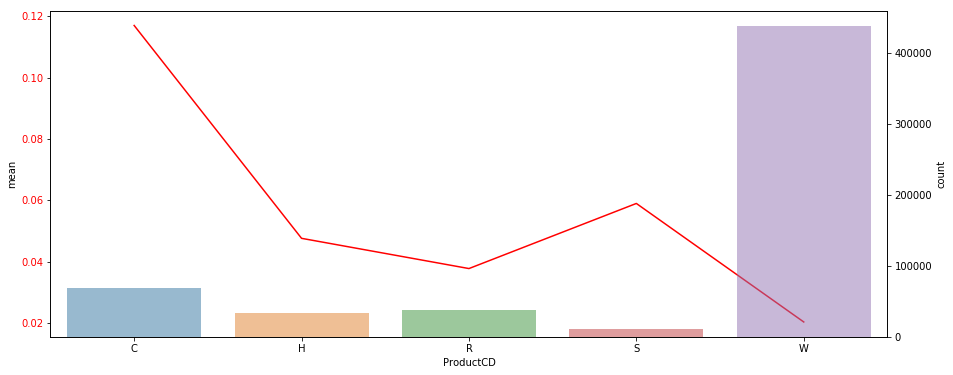

In [34]:
compare_cate(df,'ProductCD','isFraud')

              card4   count    sum      mean
0  american express    8322    239  0.028719
1          discover    6651    514  0.077282
2        mastercard  189217   6496  0.034331
3              visa  384767  13373  0.034756


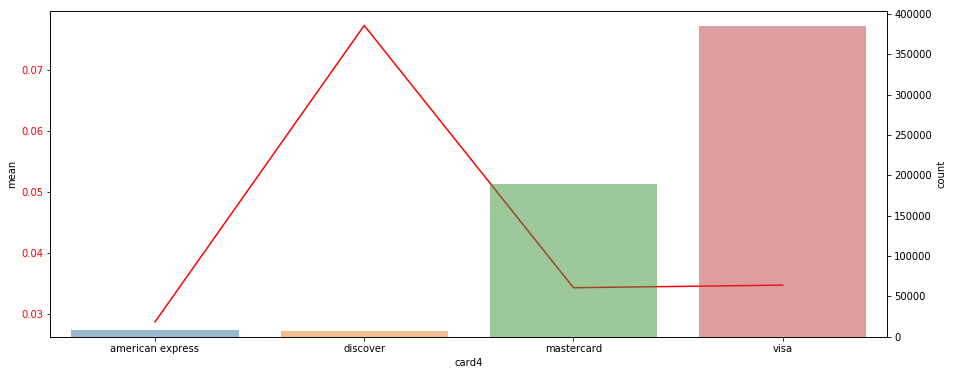

In [35]:
compare_cate(df,'card4','isFraud')

             card6   count    sum      mean
0      charge card      15      0  0.000000
1           credit  148983   9949  0.066779
2            debit  439929  10673  0.024261
3  debit or credit      30      0  0.000000


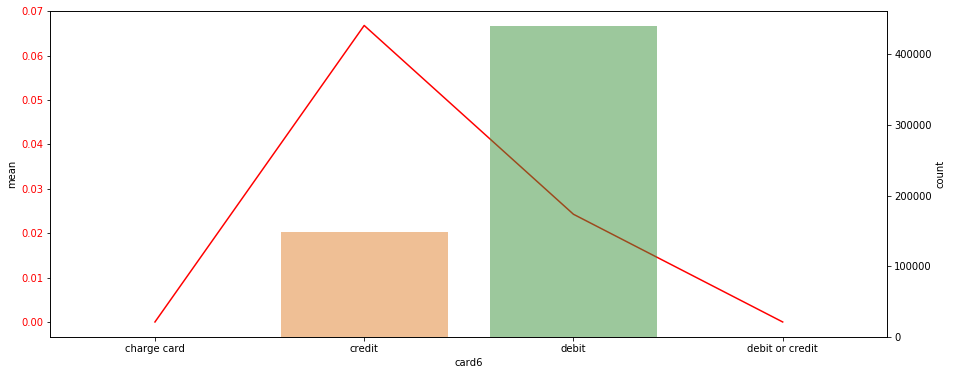

In [36]:
compare_cate(df,'card6','isFraud')

In [48]:
df.groupby("card4")["isFraud"].count()

card4
american express      8322
discover              6651
mastercard          189217
visa                384767
Name: isFraud, dtype: int64

In [262]:
def FraudRates(df,colname,size):
    nofrauds=df[df.isFraud==0].groupby([colname]).count()["isFraud"].to_frame()
    nofrauds.rename(axis=1,mapper={"isFraud":"notFrauds"},inplace=True)
    frauds=df[df.isFraud==1].groupby([colname]).count()["isFraud"].to_frame()
    frauds.rename(axis=1,mapper={"isFraud":"Frauds"},inplace=True)
    ratio_df=nofrauds.merge(frauds,on=colname,how="outer")
    ratio_df.fillna(0,inplace=True)
    ratio_df["total"]=ratio_df["notFrauds"]+ratio_df["Frauds"]
    ratio_df.reset_index(inplace=True)
     
    # plot visuals
        
    f, ax = plt.subplots(figsize=size)
    plt1 = sns.lineplot(data=(ratio_df["Frauds"]*100)/ratio_df["total"],color="r")
    ax.set_xlabel(colname)
    
    for tl in ax.get_yticklabels():
        tl.set_color('r')
    ax.set_ylabel("Fraud Rate in Percent")
    ax2 = ax.twinx()
    plt2 = sns.barplot(x=colname, y="total", data=ratio_df,
                       ax=ax2,alpha=0.5)
    for item in ax2.get_xticklabels():
        item.set_rotation(45)

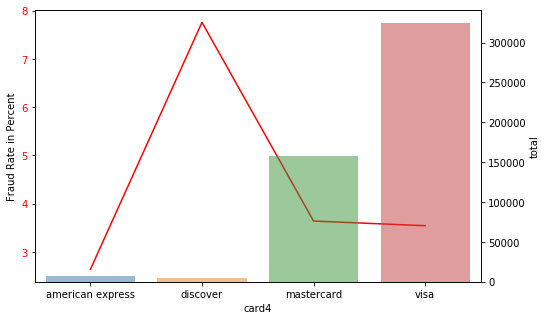

In [263]:
FraudRates(df,"card4",(8,5))

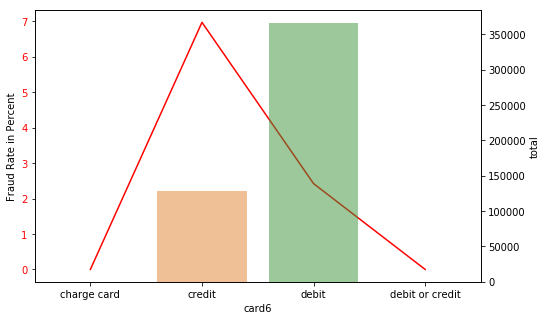

In [264]:
FraudRates(df,"card6",(8,5))

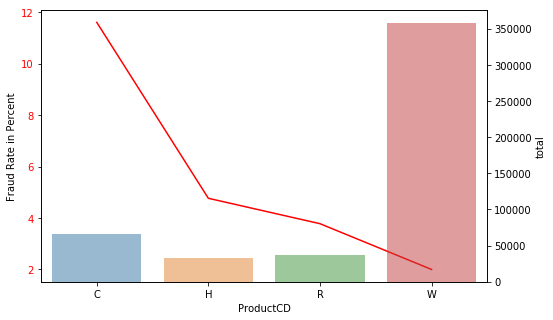

In [265]:
FraudRates(df,"ProductCD",(8,5))

In [267]:
FraudRates(df,"M1",(8,5))

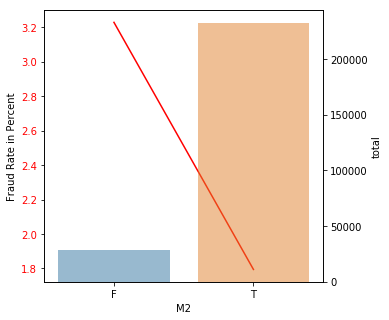

In [268]:
FraudRates(df,"M2",(5,5))

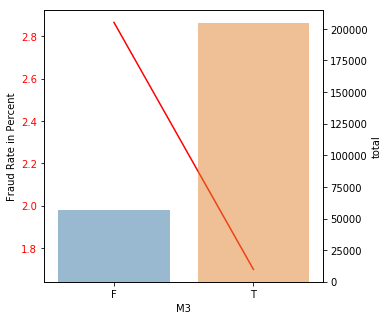

In [269]:
FraudRates(df,"M3",(5,5))

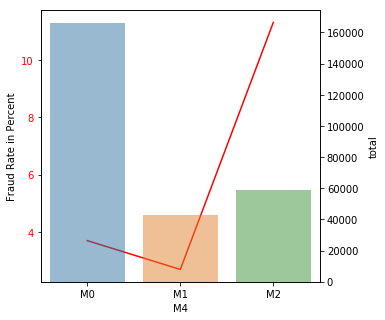

In [270]:
FraudRates(df,"M4",(5,5))

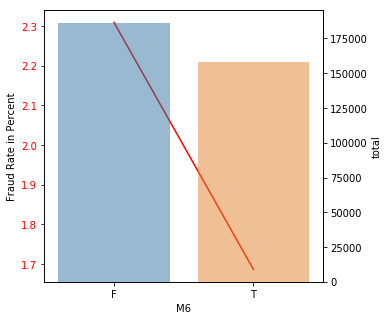

In [271]:
FraudRates(df,"M6",(5,5))

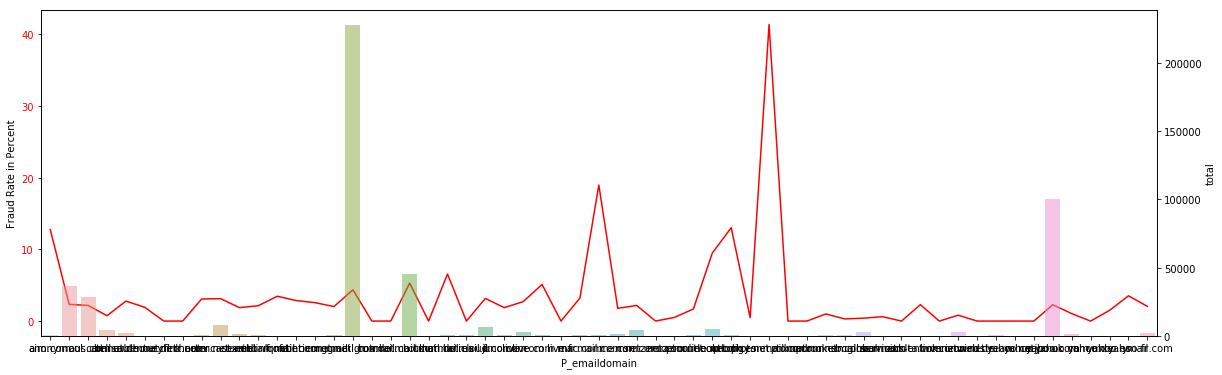

In [272]:
FraudRates(df,"P_emaildomain",(20,6))

In [273]:
categorical_columns

['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M6']

In [274]:
df.P_emaildomain.unique()

array(['gmail.com', 'outlook.com', 'yahoo.com', 'mail.com',
       'anonymous.com', 'hotmail.com', 'verizon.net', 'aol.com', 'me.com',
       'comcast.net', 'optonline.net', 'cox.net', 'charter.net',
       'rocketmail.com', 'prodigy.net.mx', 'embarqmail.com', 'icloud.com',
       'live.com.mx', 'gmail', 'live.com', 'att.net', 'juno.com',
       'ymail.com', 'sbcglobal.net', 'bellsouth.net', 'msn.com', 'q.com',
       'yahoo.com.mx', 'centurylink.net', 'servicios-ta.com',
       'earthlink.net', 'hotmail.es', 'cfl.rr.com', 'roadrunner.com',
       'netzero.net', 'gmx.de', 'suddenlink.net', 'frontiernet.net',
       'windstream.net', 'frontier.com', 'outlook.es', 'mac.com',
       'netzero.com', 'aim.com', 'web.de', 'twc.com', 'cableone.net',
       'yahoo.fr', 'yahoo.de', 'yahoo.es', 'sc.rr.com', 'ptd.net',
       'live.fr', 'yahoo.co.uk', 'hotmail.fr', 'hotmail.de',
       'hotmail.co.uk', 'protonmail.com', 'yahoo.co.jp'], dtype=object)

In [244]:
df.shape

(588957, 219)

In [245]:
df.dropna(subset=["P_emaildomain"],inplace=True)

In [246]:
df.shape

(494730, 219)

In [249]:
df["DomainMetadata"]=df.P_emaildomain.str.split(".")

In [255]:
df["DomainLength"]=[len(x) for x in df.DomainMetadata]

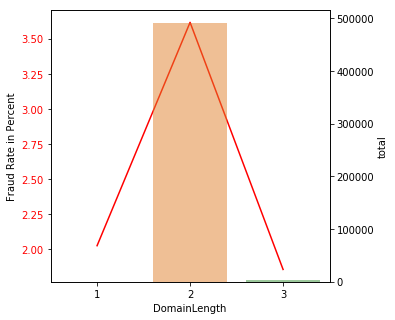

In [275]:
FraudRates(df,"DomainLength",(5,5))

In [279]:
df["DomainPart0"]=[x[0] for x in df.DomainMetadata]
#df["DomainPart1"]=[x[1] if len(x)>=2 for x in df.DomainMetadata]
#df["DomainPart2"]=[x[2] if len(x)>=2 for x in df.DomainMetadata]

In [284]:
df["DomainPart1"]=[x[1] if len(x)>=2 else np.nan for x in df.DomainMetadata]
df["DomainPart2"]=[x[2] if len(x)>2 else np.nan for x in df.DomainMetadata]

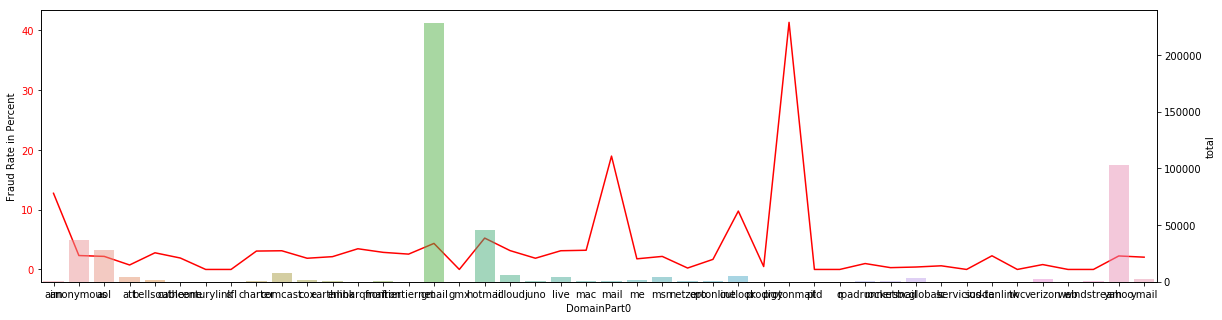

In [289]:
FraudRates(df,"DomainPart0",(20,5))

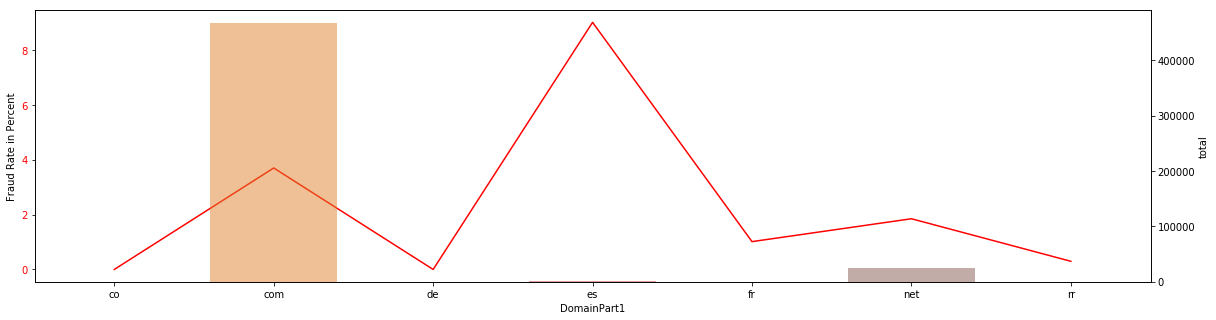

In [290]:
FraudRates(df,"DomainPart1",(20,5))

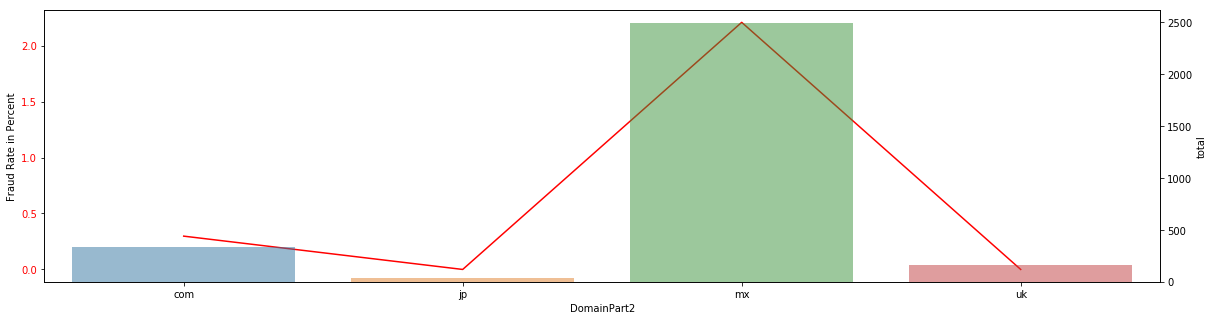

In [291]:
FraudRates(df,"DomainPart2",(20,5))